# Gradient Descent for Logistic Regression

## 1. Logistic Gradient Descent

$$J(\vec{\mathrm{w}},b)=-\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\mathrm{log}\left(f_{\vec{\mathrm{w}},b}(\vec{\mathrm{x}}^{(i)})\right)+(1-y^{(i)})\mathrm{log}\left(1-f_{\vec{\mathrm{w}},b}(\vec{\mathrm{x}}^{(i)})\right)\right]$$

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* ${f_{\vec{w},b}}(\vec{x})=\frac{1}{1+e^{(-\vec{w}\cdot\vec{x}+b)}}$
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    
    f_w_b = 1 / (1 + np.exp(-z))
    
    return f_w_b

def cost(w, b, X, y):
    
    m = X.shape[0]
    
    f_w_b = sigmoid(np.dot(X, w) + b)
    
    J_w_b = (-1 / m) * (np.dot(y, np.log(f_w_b)) + np.dot((1 - y), np.log(1 - f_w_b))) 
    
    return J_w_b

def gradient(w, b, X, y):
    
    m = X.shape[0]
    
    f_w_b = sigmoid(np.dot(X, w) + b)
       
    dj_dw = (1 / m) * np.dot((f_w_b - y), X)
    
    dj_db = (1 / m) * np.sum(f_w_b - y)
    
    return dj_dw, dj_db


def gradient_descent(X, y, alpha, iterations):
    
    n = X.shape[1]
    
    w = np.zeros(n) 
    
    b = 0
    
    for i in range(iterations):
    
        dj_dw, dj_db = gradient(w, b, X, y)

        w = w - alpha * dj_dw

        b = b - alpha * dj_db
        
        if i % 1000 == 0:
            
            print(f"Iteration:{i}\nCost:{cost(w, b, X, y)}\n")
    
    print(f"Iteration:{i}\nCost:{cost(w, b, X, y)}\n")
    
    return w, b    

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
alpha = 0.1
iters = 10000
w_out, b_out = gradient_descent(X_train, y_train, alpha, iters)
print("Best w:",w_out)
print("Best b:",b_out)

Iteration:0
Cost:0.6846104685605738

Iteration:1000
Cost:0.15909776668704562

Iteration:2000
Cost:0.08460064176930084

Iteration:3000
Cost:0.05705327279402528

Iteration:4000
Cost:0.04290759421682

Iteration:5000
Cost:0.03433847729884565

Iteration:6000
Cost:0.02860379802212006

Iteration:7000
Cost:0.02450156960879306

Iteration:8000
Cost:0.021423703325692895

Iteration:9000
Cost:0.019030137124109094

Iteration:9999
Cost:0.01711776889029292

Best w: [5.28123029 5.07815608]
Best b: -14.222409982019839


## 2. Plot Decision Boundary

In [3]:
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob

plt.style.use('./deeplearning.mplstyle')

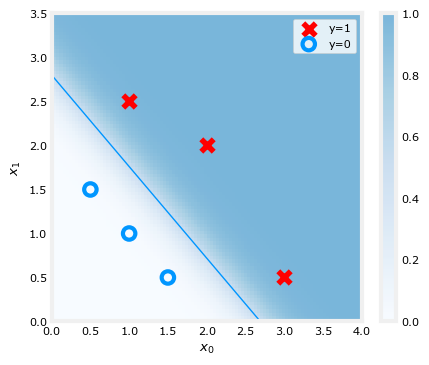

In [4]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

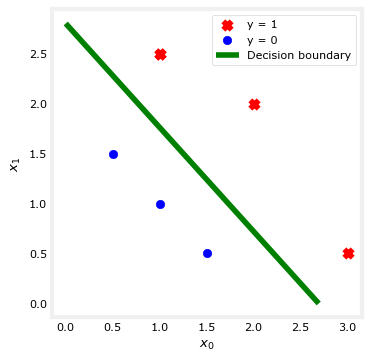

In [5]:
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]

fig, ax = plt.subplots(1,1,figsize = (4,4))

i = y_train.shape[0]

while i >= 0:
    
    if y_train[i - 1] == 1:
        
        ax.scatter(X_train[i - 1, 0],X_train[i - 1, 1], marker = 'x', c = 'red')
        
    else:
        
        ax.scatter(X_train[i - 1, 0],X_train[i - 1, 1], marker = 'o', c = 'blue')
    
    i = i - 1

ax.scatter([], [], marker='x', c='red', label='y = 1')
ax.scatter([], [], marker='o', c='blue', label='y = 0')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_title('')

ax.plot([0,x0],[x1,0], color = 'green', label = 'Decision boundary')

plt.legend()
plt.show()

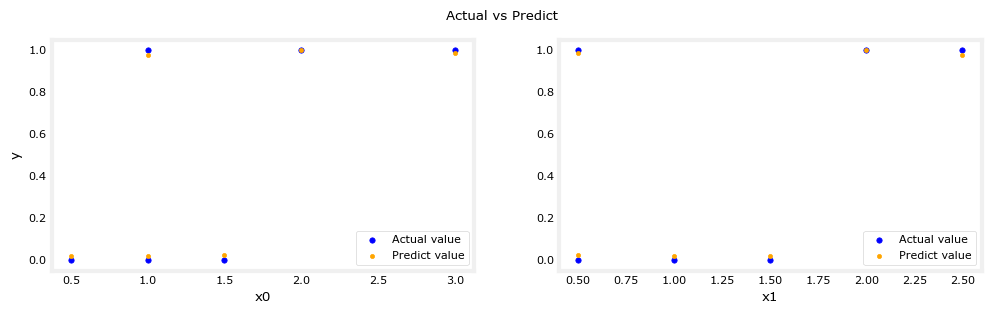

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (12,3))

feature_name = ['x0', 'x1']

y_predict = sigmoid(np.dot(X_train, w_out) + b_out)

for i in range(len(ax)):
    
    ax[i].scatter(X_train[:, i], y_train, color = 'blue', s = 15, label = "Actual value")
    
    ax[i].set_xlabel(feature_name[i])
    
    ax[i].scatter(X_train[:, i], y_predict, color = 'orange', s = 9, label = "Predict value")
    
    ax[i].legend()
    
ax[0].set_ylabel('y')

fig.suptitle("Actual vs Predict")

plt.show()

## 3. Another dataset

In [7]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

x_train = x_train.reshape(-1,1)

In [8]:
alpha = 0.1
iters = 10000
w_out, b_out = gradient_descent(x_train, y_train, alpha, iters)

Iteration:0
Cost:0.6433158133057237

Iteration:1000
Cost:0.1132929921599034

Iteration:2000
Cost:0.07793458704949963

Iteration:3000
Cost:0.0611139750771269

Iteration:4000
Cost:0.050670602336097506

Iteration:5000
Cost:0.04339775780412448

Iteration:6000
Cost:0.03799053561526236

Iteration:7000
Cost:0.03379355724130196

Iteration:8000
Cost:0.030433646671395552

Iteration:9000
Cost:0.027679790805634798

Iteration:9999
Cost:0.02538226757815515



In [9]:
print("Best w:", w_out[0])
print("Best b:", b_out)

Best w: 5.119873496232877
Best b: -12.609503113679205


In [10]:
x = np.linspace(0, 6, 1000)
z = x * w_out[0] + b_out
sigmoid_z = sigmoid(z)

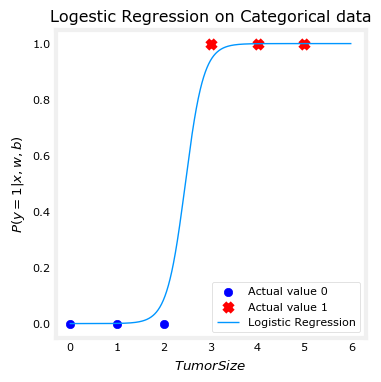

In [11]:
x_train = x_train.reshape(-1)
fig, ax = plt.subplots(1,1,figsize = (4,4))

ax.scatter(x_train[0:3], y_train[0:3], marker = 'o', c = 'blue', label = "Actual value 0")
ax.scatter(x_train[3:], y_train[3:], marker = 'x', c = 'red', label = "Actual value 1")
ax.plot(x, sigmoid_z,label = "Logistic Regression", linewidth = 1)

ax.set_xlabel('$Tumor Size$')
ax.set_ylabel('$P(y=1|x,w,b)$')
ax.set_title('Logestic Regression on Categorical data')

plt.legend(loc='lower right')
plt.show()

## REFERENCE

[1]https://www.bilibili.com/video/BV1Pa411X76s?p=36&vd_source=8c32dd2bfbfecb1eaa9b0b9c4fb4d83e

[2]https://www.coursera.org/specializations/machine-learning-introduction

[3]https://github.com/kaieye/2022-Machine-Learning-Specialization